# Wallmart Sales Prediction

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the datasets
features = pd.read_csv('features.csv')
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')

## Features:<br>
<b>Temperature:</b> Temperature of the region during that week.<br>
<b>Fuel_Price:</b> Fuel Price in that region during that week.<br>
<b>MarkDown1:5 :</b> Represents the Type of markdown and what quantity was available during that week.<br>
<b>CPI:</b> Consumer Price Index during that week.<br>
<b>Unemployment:</b> The unemployment rate during that week in the region of the store.<br>

In [3]:
# features dataset will help to do detail prediction for weekly sales
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Stores:<br>
<b>Store:</b> The store number. Range from 1–45.<br>
<b>Type:</b> Three types of stores ‘A’, ‘B’ or ‘C’.<br>
<b>Size:</b> Sets the size of a Store would be calculated by the no. of products available in the particular store ranging from 34,000 to 210,000.<br>

In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


## Sales:
<b>Date:</b> The date of the week where this observation was taken.<br>
<b>Weekly_Sales:</b> The sales recorded during that Week.<br>
<b>Dept:</b> One of 1–99 that shows the department.<br>
<b>IsHoliday:</b> A Boolean value representing a holiday week or not.<br>

In [5]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# Data Processing  and Data Preparation

In [7]:
# creating training and testing dataset for building model.
# merging train,store,features based on store datae isholiday
train_full = pd.merge(train,stores,on=['Store'],how='inner')
train_full.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [8]:
# now merging train_full and features based on stores date and is holiday 
train_f1 = pd.merge(train_full,features,on=['Store','Date','IsHoliday'])
train_f1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [9]:
# Merging test dataset
test_full = pd.merge(test,stores,on=['Store'],how='inner')
test_full.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315


In [10]:
test_f1 = pd.merge(test_full,features,on=['Store','Date','IsHoliday'])
test_f1.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [11]:
# Datasets are prepared
print(train_f1.info())
print(test_f1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null i

In [12]:
# Statistical calculations for train dataset 
# Splitting the categorical and numerical variables for statistical values
#Train Numerical Data
train_num=train_f1.select_dtypes(include=['float64','int64'])

#Train Categorical Data
train_cat = train_f1.select_dtypes(include=['object', 'O','bool'])

In [13]:
print("Numerical Variables: ")
for item in train_num.columns:
    print(item)

print("\n\nCategorical Variables:")
for item in train_cat.columns:
    print(item)

Numerical Variables: 
Store
Dept
Weekly_Sales
Size
Temperature
Fuel_Price
MarkDown1
MarkDown2
MarkDown3
MarkDown4
MarkDown5
CPI
Unemployment


Categorical Variables:
Date
IsHoliday
Type


In [14]:
train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


# Correlation

In [15]:
train_f1.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


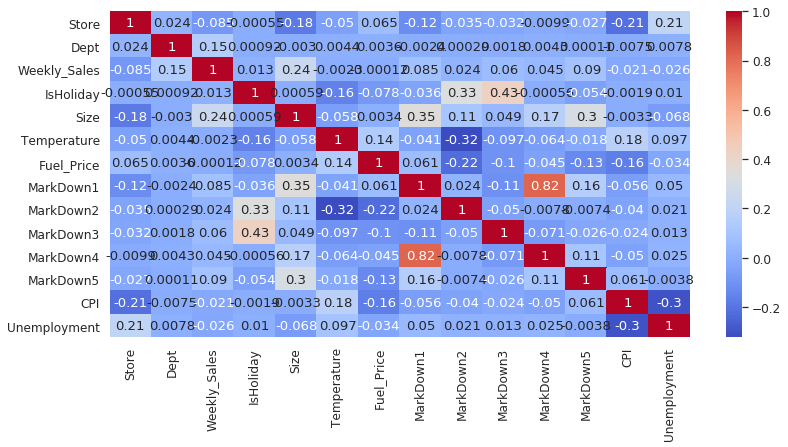

In [16]:
# heatmap for looking the correlation between the  train variables
sns.set(rc={'figure.figsize':(13,6)}, font_scale=1.1)
sns.heatmap(train_f1.corr(),annot=True,cmap='coolwarm')

### Markdown 1 and Markdown 4 are highly correlated

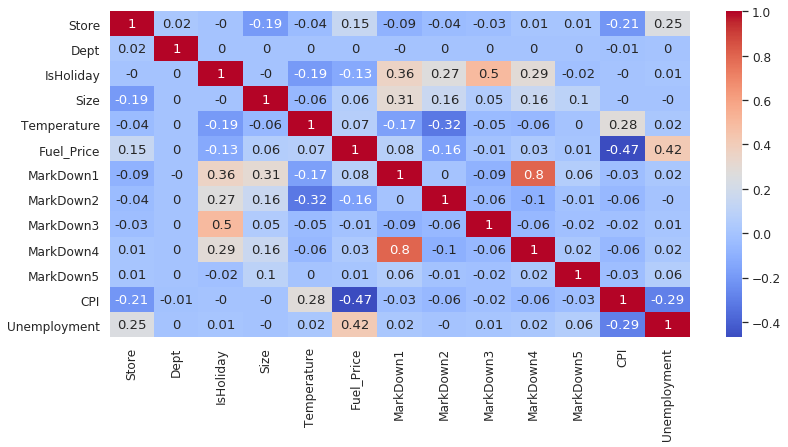

In [17]:
sns.set(rc={'figure.figsize':(13,6)}, font_scale=1.1)
sns.heatmap(test_f1.corr().round(2),annot=True,cmap='coolwarm')

# Exploratory Data Analysis

In [18]:
train_f1[train_f1['Store']==8]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
68762,8,1,2010-02-05,16181.89,False,A,155078,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299
68763,8,2,2010-02-05,37550.10,False,A,155078,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299
68764,8,3,2010-02-05,10483.04,False,A,155078,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299
68765,8,4,2010-02-05,21759.76,False,A,155078,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299
68766,8,5,2010-02-05,23880.84,False,A,155078,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299
68767,8,6,2010-02-05,4104.97,False,A,155078,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299
68768,8,7,2010-02-05,16528.54,False,A,155078,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299
68769,8,8,2010-02-05,28177.56,False,A,155078,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299
68770,8,9,2010-02-05,8244.57,False,A,155078,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299
68771,8,10,2010-02-05,28716.87,False,A,155078,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299


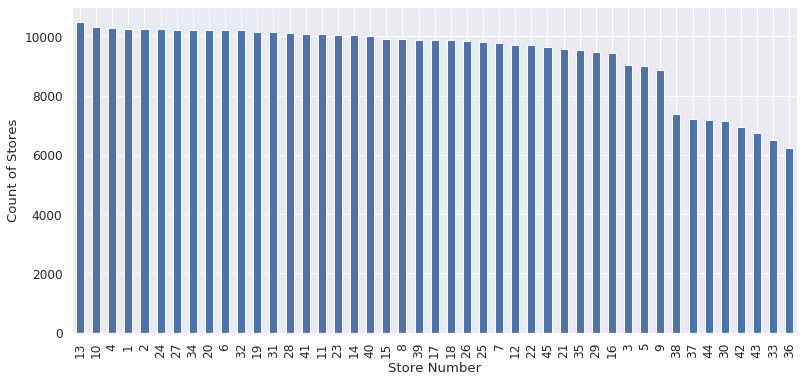

In [19]:
train_f1['Store'].sort_values().value_counts().plot(kind='bar')
plt.xlabel("Store Number")
plt.ylabel("Count of Stores")
plt.show()

### Store No. 13 is active is daily sales 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


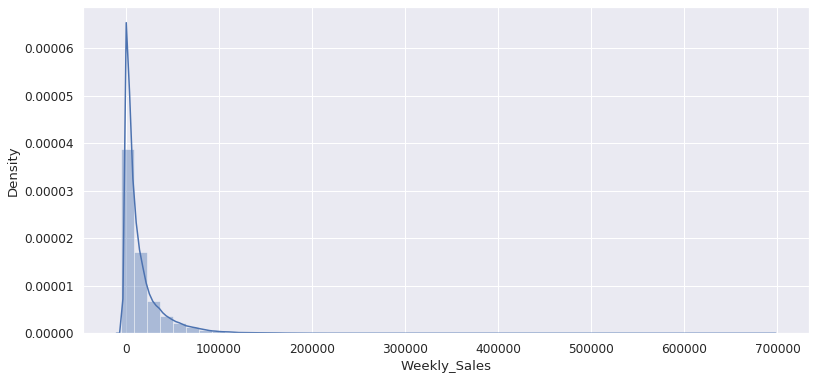

In [20]:
sns.distplot(train_f1['Weekly_Sales'])
plt.show()

### From the graph it can depicted that there are outliers in weekly sales after 1 Lac

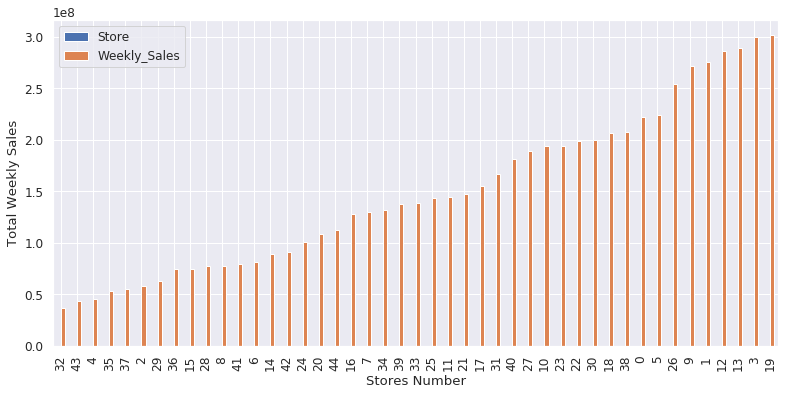

In [21]:
# bar graph of weekly sales by stores
train_f1.groupby('Store').agg({'Weekly_Sales':"sum"}).reset_index().sort_values('Weekly_Sales').plot(kind='bar')
plt.xlabel("Stores Number")
plt.ylabel("Total Weekly Sales")
plt.show()

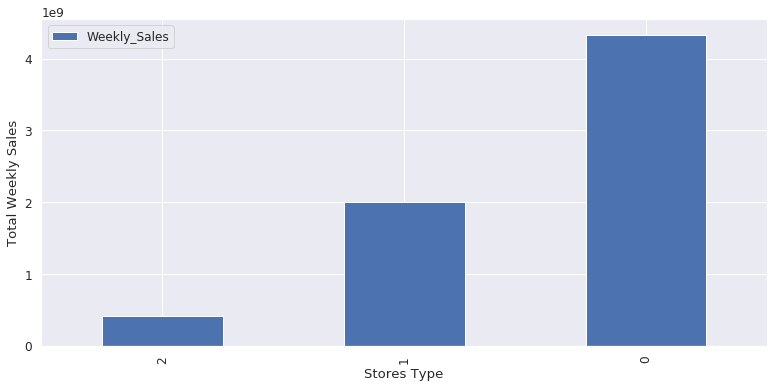

In [22]:
# Bar graph of weekly sales by type of store
train_f1.groupby('Type').agg({'Weekly_Sales':"sum"}).reset_index().sort_values('Weekly_Sales').plot(kind='bar')
plt.xlabel("Stores Type")
plt.ylabel("Total Weekly Sales")
plt.show()

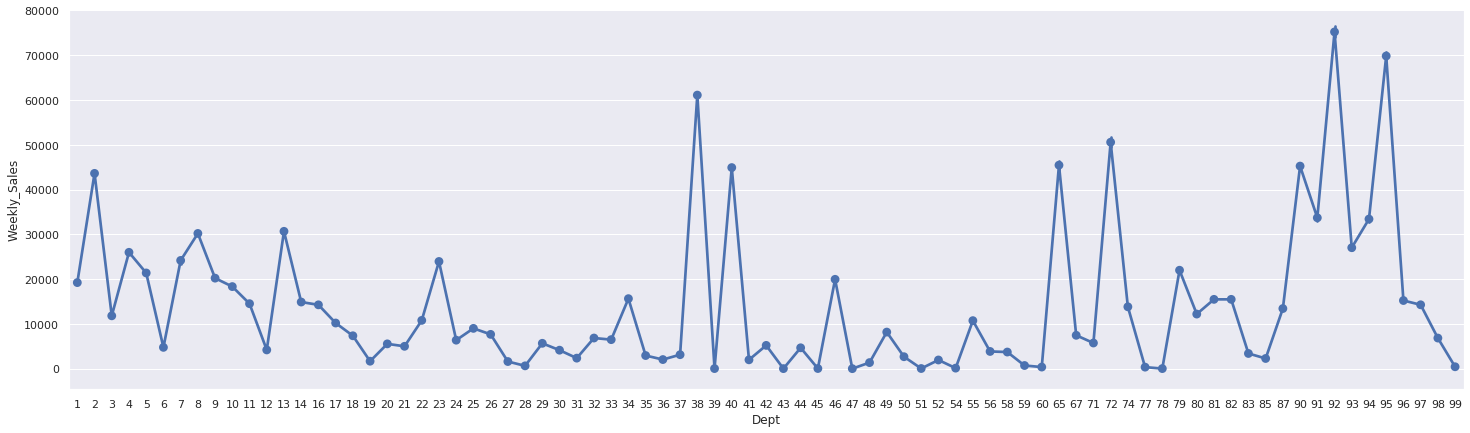

In [23]:
# point plot for weekly sales by dept
sns.set(rc={'figure.figsize':(25,7)})
sns.pointplot(x='Dept', y='Weekly_Sales',data=train_f1)
plt.show()

# Missing Values and Treating them

In [24]:
print(train_f1.isnull().sum())
print("\n")
print(test_f1.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [25]:
# there are some missing values in train and test datasets
# checking for negative values
print(train_f1.min())
print(test_f1.min())

Store                    1
Dept                     1
Date            2010-02-05
Weekly_Sales      -4988.94
IsHoliday            False
Type                     A
Size                 34875
Temperature          -2.06
Fuel_Price           2.472
MarkDown1             0.27
MarkDown2          -265.76
MarkDown3            -29.1
MarkDown4             0.22
MarkDown5           135.16
CPI                126.064
Unemployment         3.879
dtype: object
Store                    1
Dept                     1
Date            2012-11-02
IsHoliday            False
Type                     A
Size                 34875
Temperature          -7.29
Fuel_Price           2.872
MarkDown1         -2781.45
MarkDown2           -35.74
MarkDown3          -179.26
MarkDown4             0.22
MarkDown5          -185.17
CPI                131.236
Unemployment         3.684
dtype: object


In [26]:
# from the above result weekly sales in train dataset has negative values which is not possible replacing them with 0
# and also in test dataset there are some negative value replacing them with 0
train_f1.loc[train_f1['Weekly_Sales'] < 0 ,'Weekly_Sales'] = 0
train_f1.loc[train_f1['MarkDown2'] < 0 ,'MarkDown2'] = 0
train_f1.loc[train_f1['MarkDown3'] < 0, 'MarkDown3'] = 0
test_f1.loc[test_f1['MarkDown1'] < 0 ,'MarkDown1']= 0
test_f1.loc[test_f1['MarkDown2'] < 0, 'MarkDown2'] = 0
test_f1.loc[test_f1['MarkDown3'] < 0 ,'MarkDown3']= 0
test_f1.loc[test_f1['MarkDown5'] < 0 ,'MarkDown5']= 0

In [27]:
# CPI and unemployment for the test dataset has null values imputing them with mean values
test_f1['CPI'] = test_f1.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test_f1['Unemployment'] = test_f1.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [28]:
# filling the missing values for markdowns with 0 in train and test
train_f1 = train_f1.fillna(0)
test_f1 = test_f1.fillna(0)

In [29]:
print(train_f1.isnull().sum())
print(test_f1.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


# Outlier Treatment and New Variables In train Dataset

In [30]:
train_f1[train_f1['Temperature']>100].head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
315010,33,1,2010-07-16,950.09,False,A,39690,100.14,2.971,0.0,0.0,0.0,0.0,0.0,126.149806,9.495
315011,33,2,2010-07-16,7308.46,False,A,39690,100.14,2.971,0.0,0.0,0.0,0.0,0.0,126.149806,9.495


In [31]:
# converting farenheit to degree celcius 
train_f1['Temperature'] = (train_f1['Temperature'] - 32) * 5/9
test_f1['Temperature'] = (test_f1['Temperature'] - 32) * 5/9

In [32]:
# as the datatype of date in object converting it to Datetime datatype
train_f1['Date'] = pd.to_datetime(train_f1['Date'])
test_f1['Date'] = pd.to_datetime(test_f1['Date'])

In [33]:

# Extracting date features
train_f1["Date"]=pd.to_datetime(train["Date"])
train_f1["Day"]=train_f1['Date'].dt.day
train_f1["Week"]=train_f1['Date'].dt.week
train_f1["Month"]=train_f1['Date'].dt.month
train_f1["Year"]=train_f1['Date'].dt.year

test_f1["Day"]=test_f1['Date'].dt.day
test_f1["Week"]=test_f1['Date'].dt.week
test_f1["Month"]=test_f1['Date'].dt.month
test_f1["Year"]=test_f1['Date'].dt.year

In [34]:
# Setting dates if all holidays in past few years

#SUPERBOWL DATES
s_1=np.datetime64('2010-02-12')
s_2=np.datetime64('2011-02-11')
s_3=np.datetime64('2012-02-10')
s_4=np.datetime64('2013-02-08')

#labor day
l_1=np.datetime64('2010-09-10')
l_2=np.datetime64('2011-09-09')
l_3=np.datetime64('2012-09-07')
l_4=np.datetime64('2013-09-06')

#thanksgiving
t_1=np.datetime64('2010-11-26')
t_2=np.datetime64('2011-11-25')
t_3=np.datetime64('2012-11-23')
t_4=np.datetime64('2013-11-29')

#christams day
c_1=np.datetime64('2010-12-31')
c_2=np.datetime64('2011-12-30')
c_3=np.datetime64('2012-12-28')
c_4=np.datetime64('2013-12-27')

In [35]:
#Extracting all sales done on festival days (from train data)
#Creating new variables on train data
train_f1['Superbowl']=np.where(((train_f1.Date==s_1) | (train_f1.Date==s_2) |
                                  (train_f1.Date==s_3) | (train_f1.Date==s_4)),1,0)

train_f1['labor']= np.where(((train_f1.Date==l_1) | (train_f1.Date==l_2) |
                                  (train_f1.Date==l_3) | (train_f1.Date==l_4)),1,0)

train_f1['thanksgiving']=np.where(((train_f1.Date==t_1) | (train_f1.Date==t_2) |
                                  (train_f1.Date==t_3) | (train_f1.Date==t_4)),1,0)

train_f1['christmas']=np.where(((train_f1.Date==c_1) | (train_f1.Date==c_2) |
                             (train_f1.Date==c_3) | (train_f1.Date==c_4)),1,0)

train_f1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2010-02-05,24924.50,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
1,1,2,2010-02-12,50605.27,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,12,6,2,2010,1,0,0,0
2,1,3,2010-02-19,13740.12,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,19,7,2,2010,0,0,0,0
3,1,4,2010-02-26,39954.04,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,26,8,2,2010,0,0,0,0
4,1,5,2010-03-05,32229.38,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,9,3,2010,0,0,0,0


In [36]:
#Extracting sales done on festival days (from test data)
#Creating new variables on test data
test_f1['Superbowl']=np.where(((test_f1.Date==s_1) | (test_f1.Date==s_2) |
                                  (test_f1.Date==s_3) | (test_f1.Date==s_4)),1,0)

test_f1['labor']= np.where(((test_f1.Date==l_1) | (test_f1.Date==l_2) |
                                  (test_f1.Date==l_3) | (test_f1.Date==l_4)),1,0)

test_f1['thanksgiving']=np.where(((test_f1.Date==t_1) | (test_f1.Date==t_2) |
                                  (test_f1.Date==t_3) | (test_f1.Date==t_4)),1,0)

test_f1['christmas']=np.where(((test_f1.Date==c_1) | (test_f1.Date==c_2) |
                             (test_f1.Date==c_3) | (test_f1.Date==c_4)),1,0)

test_f1.head()


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
1,1,2,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
2,1,3,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
3,1,4,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
4,1,5,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0


In [37]:
#converting IsHoliday variables from true/false to 1/0 on train data
train_f1['IsHoliday']=np.where((train_f1.IsHoliday==True),1,0)
train_f1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2010-02-05,24924.50,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
1,1,2,2010-02-12,50605.27,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,12,6,2,2010,1,0,0,0
2,1,3,2010-02-19,13740.12,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,19,7,2,2010,0,0,0,0
3,1,4,2010-02-26,39954.04,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,26,8,2,2010,0,0,0,0
4,1,5,2010-03-05,32229.38,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,9,3,2010,0,0,0,0


In [38]:
#converting IsHoliday variables from true/false to 1/0 on test data
test_f1['IsHoliday']=np.where((test_f1.IsHoliday==True),1,0)
test_f1.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
1,1,2,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
2,1,3,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
3,1,4,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
4,1,5,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0


In [39]:
#Changing the values og IsHoliday Column according to sepcial holidays
train_f1['IsHoliday']=train_f1['IsHoliday']|train_f1['Superbowl']|train_f1['labor']|train_f1['thanksgiving']|train_f1['christmas']
test_f1['IsHoliday']=test_f1['IsHoliday']|test_f1['Superbowl']|test_f1['labor']|test_f1['thanksgiving']|test_f1['christmas']

In [40]:
#Dropping the extra columns that are of no use
dplist=['Superbowl', 'labor', 'thanksgiving', 'christmas']
train_f1.drop(dplist,inplace=True,axis=1)
test_f1.drop(dplist,inplace=True,axis=1)

In [41]:
train_f1=pd.get_dummies(train_f1, drop_first=True)
test_f1=pd.get_dummies(test_f1,drop_first=True)

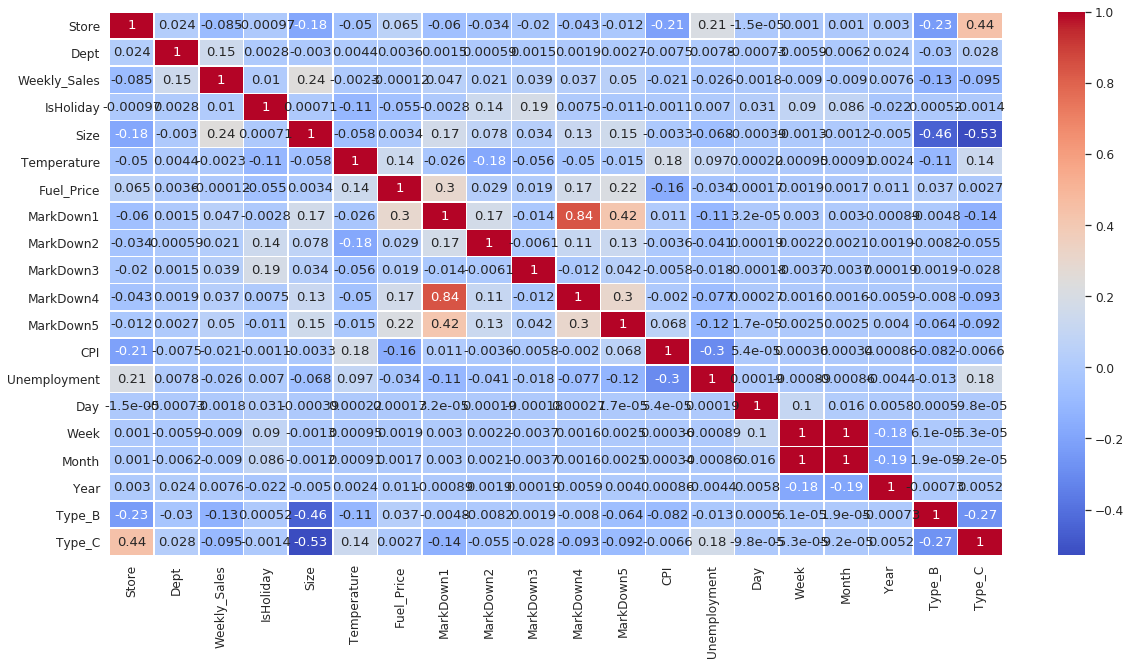

In [42]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(train_f1.corr(),linewidths=0.5,annot=True,cmap='coolwarm')

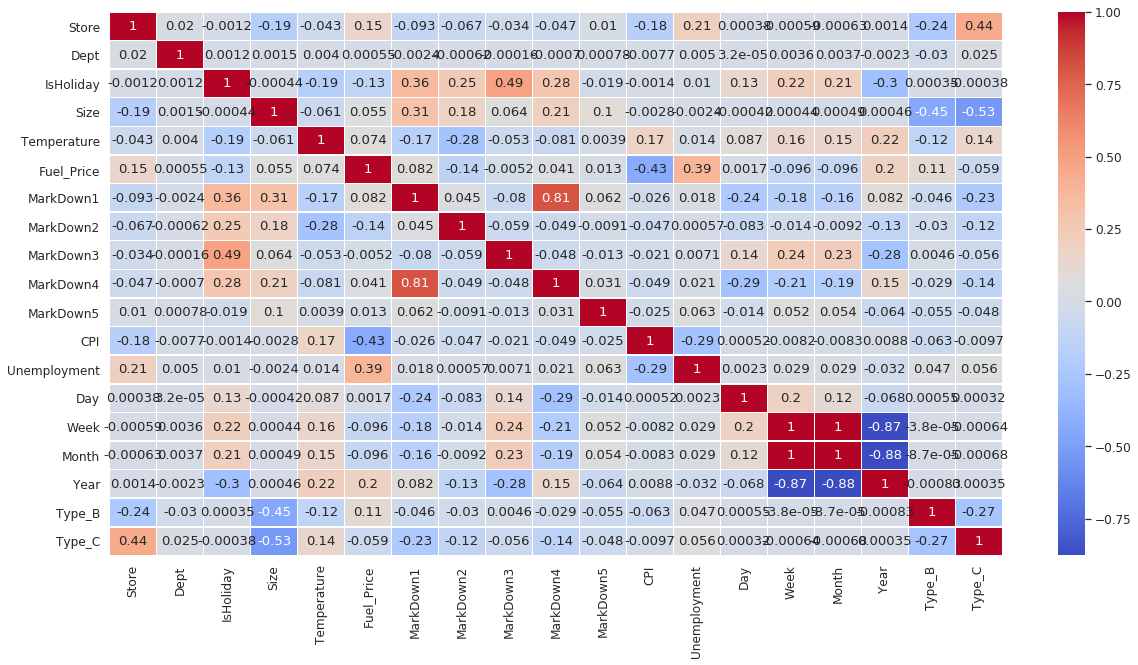

In [43]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(test_f1.corr(),linewidths=0.5,annot=True,cmap='coolwarm')

<b>1. Markdown 4 is highly correlated to Markdown 1<br>
2. Fuel Price is highly correlated to Year (It must be)<br>
3. Size and Type are negatively correlated<br>
4. Unemployment, CPI are correlated<br>
5. Temperature is negatively correlated to unemployment<br></b>

In [44]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [45]:
dpcol=['MarkDown1', 'MarkDown5', 'Year' , 'Day', 'Month' , 'CPI', 'Unemployment'] 
train_f1.drop(dpcol,inplace=True,axis=1)
test_f1.drop(dpcol,inplace=True,axis=1)

In [46]:
# Converting all float var int integer..
for var in train_f1:
    if train_f1[var].dtypes == float:
        train_f1[var]=train_f1[var].astype(int)
        
for var in test_f1:
    if test_f1[var].dtypes == float:
        test_f1[var]=test_f1[var].astype(int)

# Train and Test Definition

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
#splitting dataset into training and testing data
train_X, test_X, train_Y, test_Y=train_test_split(train_f1.drop(['Weekly_Sales','Date'], axis=1),train_f1['Weekly_Sales'], test_size=0.2, random_state=1)

# Decision Tree

In [49]:
#decision tree function in sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [50]:
#creating object of decision tree regressor
reg = DecisionTreeRegressor()
#fit the model on training data
reg.fit(train_X,train_Y)

DecisionTreeRegressor()

In [51]:
#predict sales from train data
train_y_pred_dt = reg.predict(train_X)
acc_train_dt = r2_score(train_Y,(train_y_pred_dt))
print("Training Accuracy of Decision Tree Model: "+str(round(acc_train_dt*100,2))+'%')

#predict sales from test data
test_y_pred_dt = reg.predict(test_X)
acc_test_dt = r2_score(test_Y,(test_y_pred_dt))
print("Testing Accuracy of Decision Tree Model: "+str(round(acc_test_dt*100,2))+'%')

Training Accuracy of Decision Tree Model: 99.96%
Testing Accuracy of Decision Tree Model: 85.58%


# Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
#creating object of linear regression and fitting on training data
lm = LinearRegression()
lm.fit(train_X,train_Y)

#predict sales from train data
train_y_pred_lm = lm.predict(train_X)
acc_train_lm =r2_score(train_Y,train_y_pred_lm)
print("Training Accuracy of Linear Regression Model: "+str(round(acc_train_lm*100,2))+'%')

#predict sales from test data
test_y_pred_lm = lm.predict(test_X)
acc_test_lm =r2_score(test_Y,test_y_pred_lm)
print("Testing Accuracy of Linear Regression Model: "+str(round(acc_test_lm*100,2))+'%')

Training Accuracy of Linear Regression Model: 8.86%
Testing Accuracy of Linear Regression Model: 8.57%


# Random Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
#creating object of random forest regressor and fitting on training data
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(train_X,train_Y)

#predict sales from train data
train_y_pred_rfr = rfr.predict(train_X)
acc_train_rfr =r2_score(train_Y,train_y_pred_rfr)
print("Training Accuracy of Random Forest Regression: "+str(round(acc_train_rfr*100,2))+'%')

#predict sales from test data
test_y_pred_rfr = rfr.predict(test_X)
acc_test_rfr = r2_score(test_Y,test_y_pred_rfr)
print("Testing Accuracy of Random Forest Regression: "+str(round(acc_test_rfr*100,2))+'%')

Training Accuracy of Random Forest Regression: 98.56%
Testing Accuracy of Random Forest Regression: 91.37%


# Comparison of models


In [56]:
# this comparison is done based on r2 values
compare_models = pd.DataFrame({'Model':['Linear Regression','Random Forest','Decision Tree'],
                      'Score':[round(acc_train_lm*100,2),round(acc_train_rfr*100,2),round(acc_train_dt*100,2)]})
compare_models.sort_values(by='Score',ascending= False)

,Model,Score
2,Decision Tree,99.96
1,Random Forest,98.56
0,Linear Regression,8.86
